# DetPoisson [GitHub repo](https://github.com/hpaulkeeler/DetPoisson_Python) dedicated to [article](https://arxiv.org/pdf/1810.08672.pdf) from Błaszczyszyn & Keeler

#### The authors mention [DPPy](https://github.com/guilgautier/DPPy) as a way to sample DPPs
#### Here is a more Pythonic implementation that uses [DPPy](https://github.com/guilgautier/DPPy) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import euclidean_distances # to compute |x-y|^2

def kernel(name='RBF', data=np.random.rand(2,2), **kwargs):
    """Compute kernel matrix associated to data points"""

    sigma = kwargs.get('sigma', 1.0) # Scale parameter of kernel
    alpha = kwargs.get('alpha', 1.0) # Exponent parameter for Cauchy
    
    dist_sq = euclidean_distances(data, data)
    
    if name == 'RBF':
        return np.exp(-dist_sq/sigma**2)
    
    elif name == 'Cauchy':
        return 1/(1+dist_sq/sigma**2)**(alpha+1/2)
    
    else:
        raise ValueError('Invalid kernel name, choose `RBF` or `Cauchy`')

#### Clone DPPy and create access its source code

In [2]:
#!rm -rf DPPy
!git clone https://github.com/guilgautier/DPPy.git

import os
import sys
sys.path.insert(0, os.path.abspath('DPPy')) # Access DPPy source code

from dppy.finite_dpps import FiniteDPP

fatal: destination path 'DPPy' already exists and is not an empty directory.


### Sample from 2D Poisson Process

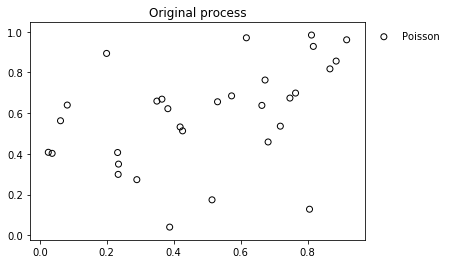

In [3]:
# Simulation window parameters
x_min, x_max = 0, 1; x_delta = x_max-x_min
y_min, y_max = 0, 1; y_delta = y_max-y_min
area = x_delta*y_delta

# Sample from 2D Poisson process
lmbda = 30
nb_pts = np.random.poisson(lam=lmbda*area, size=1)[0]
poiss_pts = np.array([x_min, y_min]) + np.random.rand(nb_pts, 2)

# Display
fig, ax = plt.subplots(1,1)
plt.title('Original process')
# Poisson point process
ax.scatter(poiss_pts[:, 0], poiss_pts[:, 1], 
           label='Poisson',
           marker='o', edgecolor='k', facecolor='none')
plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.show()

### Build kernel and create DPPy object

In [4]:
# Build kernel
kernel_name = 'RBF' # 'RBF','Cauchy'
sigma, alpha = 2.0, 1.0
L = lmbda*kernel(name=kernel_name, data=poiss_pts, **{'sigma':sigma, 'alpha':alpha})

# Sampling from DPP(L)
DPP = FiniteDPP("marginal", **{"L":L})

### Sample from DPP(L)

In [5]:
# Sample from DPP(L)
DPP.sample_exact()
dpp_sample = DPP.list_of_samples[-1]
dpp_sample

[15, 5, 25, 29, 30, 20, 11, 4, 9, 18, 28, 1, 2, 0, 7, 26, 3, 23]

### Display the original process and its DPP-thinned version

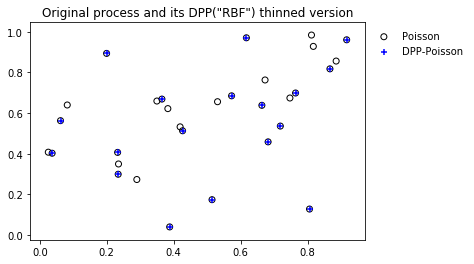

In [6]:
# Display
fig, ax = plt.subplots(1,1)
plt.title('Original process and its DPP("{}") thinned version'.format(kernel_name))
# Poisson point process
ax.scatter(poiss_pts[:, 0], poiss_pts[:, 1], 
           label='Poisson',
           marker='o', edgecolor='k', facecolor='none')
# Thinned (using DPP) Poisson point process
ax.scatter(poiss_pts[dpp_sample, 0], poiss_pts[dpp_sample, 1],
           label='DPP-Poisson',
           marker='+', facecolor='blue')
plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.show()

### Display underlying DPP kernel using DPPy

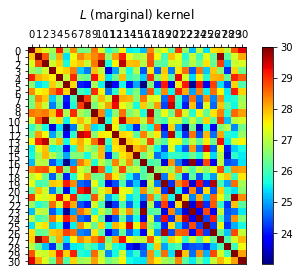

In [7]:
DPP.plot_kernel()